# HW 11

In [359]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### Array Multiples
Write a function **`array_multiples(arr, num)`** that selects from an integer array the multiples of integer `num`. **Use numpy boolean indexing.** Do not use a loop.

Example:<br>
```
arr = np.array([[19, 14, 11], [20, 27, 16]])
array_multiples(arr, 4)
```
returns `array([20, 16])`.

In [431]:
def array_multiples(arr, num):
    return arr[arr % num == 0]

In [437]:
arr = np.array([[19, 14, 11], [20, 27, 16]])
array_multiples(arr, 4)

array([20, 16])

### Array Large Numbers
Write a function **`array_large(arr, ndigits)`** that selects from an array of positive integers the numbers that have at least `ndigits` digits. Assume that `ndigits` is a positive integer. **Use numpy boolean indexing.** Do not use a loop. Do not convert the numbers to strings.

Example:<br>
```
arr = np.array([[536, 21, 3105], [17086, 1419,  673]])
array_large(arr, 4)
```
returns
```
array([ 3105, 17086,  1419])
```

In [364]:
def array_large(arr, ndigits):
    return arr[arr // 10**(ndigits-1) != 0]

In [365]:
arr = np.array([[536, 21, 3105], [17086, 1419,  673]])
array_large(arr, 4)

array([ 3105, 17086,  1419])

### Square Root of Array Elements
If the `math.sqrt()` function is applied to a negative number, it generates an error. If the `np.sqrt()` function is applied to a negative number, it returns `nan` (which stands for "not a number").

Write a function called **`sqrt_new(num)`** that returns `0.0` if `num` is negative and otherwise returns the square root of `num`.

Examples:<br>
`sqrt_new(49)` returns `7.0`.<br>
`sqrt_new(-5)` returns `0.0`.

In [367]:
def sqrt_new(num):
    if num < 0:
        return 0.0
    else:
        return np.sqrt(num)

Write a function **`array_sqrt(arr)`** that applies `sqrt_new()` to each element of `arr` using vectorization. Do not use a loop. (*Hint:* You will need to vectorize `sqrt_new()`.) 

Example:<br>
`array_sqrt(np.arange(-1, 5).reshape(2, 3))` returns
```
array([[0.        , 0.        , 1.        ],
       [1.41421356, 1.73205081, 2.        ]])
```

In [369]:
def array_sqrt(arr):
    vect = np.vectorize(sqrt_new)
    return vect(arr)

In [370]:
array_sqrt(np.arange(-1, 5).reshape(2, 3))

array([[0.        , 0.        , 1.        ],
       [1.41421356, 1.73205081, 2.        ]])

### Polygon Area
Here is an algorithm for calculating the area of an $n$-sided polygon given the coordinates of its vertices. First write the $(x,y)$ coordinates in a column in order (either clockwise or counterclockwise), repeating the first vertex. Then multiply each $x$-coordinate in the first $n$ rows by the $y$-coordinate in the next row down and calculate the sum $S_1 = x_1y_2 + x_2y_3 + \cdots + x_ny_1$. Next multiply each $y$-coordinate in the first $n$ rows by the $x$-coordinate in the next row down and calculate the sum $S_2 = x_2y_1 + x_3y_2 + \cdots + x_1y_n$. The area then equals $\frac 12 \left|S_1 - S_2\right|$.

 <img src="http://www.coloradomath.org/python/shoelace.png" width="120" />
 

For example, consider the triangle with vertices at $(2, 4)$, $(3, -8)$, and $(1, 2)$. The coordinates written in a column, repeating the first pair, are
 
```
   2   4
   3  -8
   1   2
   2   4
```

 Then 
 
 $S_1 = 2(-8) + 3(2) + 1(4) = -6$<br>
 $S_2 = 3(4) + 1(-8) + 2(2) = 8$
 
 and the area is $A = \frac 12 \lvert S_1 - S_2 \rvert = \frac 12 \lvert -6 - 8 \rvert = 7$.

Write a function **`polygon_area(vertices)`** that takes an $n\times 2$ array of vertices and returns the area of the corresponding polygon. **Use numpy operations.** Do not use a loop.
 
 Example:<br>
```
triangle = np.array([(2, 4), (3, -8), (1, 2)])
polygon_area(triangle)
```
 returns `7.0` 

In [464]:
import numpy as np

def polygon_area(vertices):
    # Append the first vertex to the end of the array
    vertices = np.vstack([vertices, vertices[0]])
    
    # Calculate the two dot products
    col11 = vertices[:-1, 0] 
    col12 = vertices[1:, 1]
    dot1 = col11.dot(col12)
    
    col21 = vertices[1:, 0]
    col22 = vertices[:-1, 1]
    dot2 = col21.dot(col22)
    return abs(dot1 - dot2) / 2

In [466]:
triangle = np.array([(2, 4), (3, -8), (1, 2)])
polygon_area(triangle)

7.0

Verify that the function correctly calculates the area of this polygon.

 <img src="http://www.coloradomath.org/python/polygon-area.png" />

In [449]:
weird = np.array([(0, 4), (3, 4), (3, 2), (2, 3), (2, 1), (1, 0), (1, 3)])

In [458]:
polygon_area(weird)

5.5

___

For the following problems, you may use numpy operations but it is not necessary.

### Robot
Suppose a robot begins in the center square `e` of the $3\times 3$ grid shown below and moves one square at a time according to the instructions `'U'`, `'D'`, `'L'`, or `'R'`, which correspond to up, down, left, or right, respectively.

 <img src="http://www.coloradomath.org/python/grid-abc.jpg" width="300" height="300" />
 

Write a function **`robot3x3(moves)`** that takes a string of moves and returns the final position of the robot. A move that would take the robot off the board would instead wrap around to the other side of the board. (*Hint:* Use the `%` operator.)
 
 Examples:  
 `robot3x3('DD')` returns `'b'`.  
 `robot3x3('RULLD')` returns `'d'`.  
 `robot3x3('RUURUL')` returns `'f'`.

In [381]:
def robot3x3(moves):
    board = np.array([
        ['a', 'b', 'c'],
        ['d', 'e', 'f'],
        ['g', 'h', 'i']
    ])
    
    x, y = 1, 1 

    for move in moves:
        if move == 'U':
            x = (x - 1) % 3
        elif move == 'D':
            x = (x + 1) % 3
        elif move == 'L':
            y = (y - 1) % 3
        elif move == 'R':
            y = (y + 1) % 3

    return board[x, y]

In [382]:
robot3x3('DD')

'b'

In [383]:
robot3x3('RULLD')

'd'

Write a function **`robot3x3_sim(nmoves, nsim)`** that approximates the probability that after a given number of moves, the robot is back in the center square. It should call `robot3x3()`. Assume that the robot moves up, down, left, or right with equal probability.

Example:<br>
`robot3x3_sim(4, 1000)` might return `0.1454`.

In [472]:
def robot3x3_sim(nmoves, nsim):
    moves = ['U', 'D', 'L', 'R']
    center_count = 0

    for i in range(nsim):
        random_move = ''.join(random.choice(moves) for i in range(nmoves))
        if robot3x3(random_move) == 'e':
            center_count += 1
    return center_count / nsim

In [474]:
robot3x3_sim(4, 1000)

0.134

### Central Limit Theorem

Suppose you have a large set of numbers. Next draw samples from the set and calculate the mean of each sample. Now examine the distribution of the sample means. The *Central Limit Theorem* states that if the sample size is large enough (at least 30), the distribution of sample means will approach a normal distribution, even if the original distribution is not normally distributed. Let's test this.

Create a list called **`randnums`** consisting of 2500 random real numbers drawn from the interval $[0, 10]$ and 1000 random real numbers drawn from the interval $[15, 25]$. 

In [387]:
randnums = [random.uniform(0, 10) for n in range(2500)] + [random.uniform(15, 25) for n in range(1000)]

Use `plt.hist(randnums, 15)` to **make a histogram** with 15 bins showing the frequency counts for the numbers. Here is one possible result. Note that the distribution is not normal.

  <img src="http://www.coloradomath.org/python/random-nums-dist-15bins.jpg" width="432" height="288" />

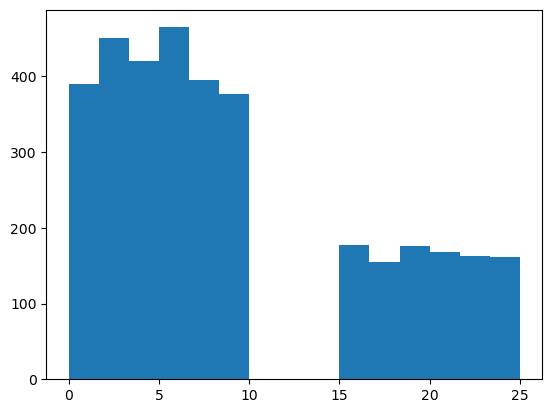

In [389]:
plt.hist(randnums, 15)
plt.show()

Write a function **`sample_mean(nums, size)`** that takes a list of numbers called `nums` and calls `random.sample()` to select a sample of the given `size`. The function returns the mean of the sample. You may wish to use `np.mean()`.

In [391]:
def sample_mean(nums, size):
    rand = random.sample(nums, size)
    return np.mean(rand)

Write a function **`sample_means(nums, size, nsamples)`** that calls `sample_mean()` `nsamples` times and returns the results in a list. You may assume that `size` is smaller than the length of `nums`.

In [393]:
def sample_means(nums, size, nsamples):
    return [sample_mean(nums, size) for n in range(nsamples)]

**Create a histogram** with 15 bins for `sample_means(randnums, 50, 200)`. Add a vertical line showing where the actual mean is located. (*Hint:*Use `plt.axvline()`.) The histogram should look approximately normal, unlike the original distribution. Here is one possible result.

  <img src="http://www.coloradomath.org/python/central-limit-15bins.jpg"  width="432" height="288" />

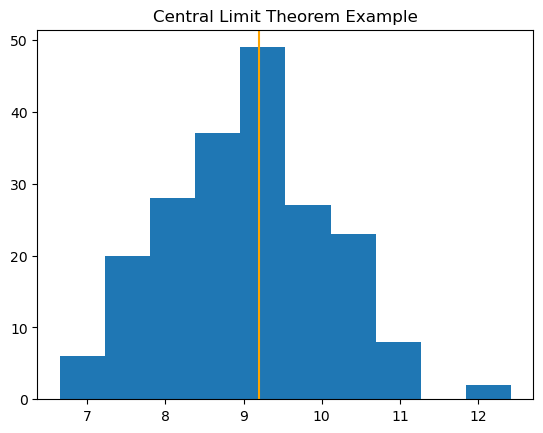

In [395]:
plt.hist(sample_means(randnums, 50, 200))
plt.title('Central Limit Theorem Example')
plt.axvline(np.array(sample_means(randnums, 50, 200)).mean(), c='orange')
plt.show()